# Hand Crafting features

In [2]:
import sys
sys.chdir('../')

import numpy as np
import pandas as pd
import random
import time

random.seed(7)

from src.utils import preprocess

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
X_train_pd = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Y_train_pd = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=";")

In [4]:
X_train, Y_train, X_val, Y_val = preprocess(X_train_pd, Y_train_pd, 0.8)

In [5]:
nb_games_train = len(X_train)
nb_games_val = len(X_val)

# Long the features as images and average each component - Complete features

In [6]:
X_train_l_cf = X_train.reshape((nb_games_train, 11, 1440), order = 'F')
X_val_l_cf = X_val.reshape((nb_games_val, 11, 1440), order = 'F')

In [8]:
X_train_m_cf = X_train_l_cf.mean(axis=2)
X_val_m_cf = X_val_l_cf.mean(axis=2)

Proportion of variance explained: [0.62137474 0.15645845]


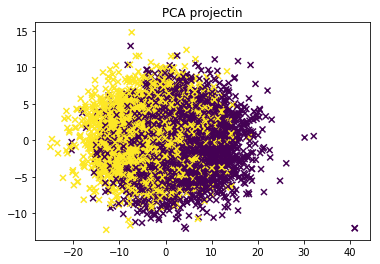

In [92]:
from sklearn.decomposition import PCA

projection = PCA(n_components = 2)
X_train_projected = projection.fit_transform(X_train_m_cf)
print('Proportion of variance explained: {}'.format(projection.explained_variance_ratio_))

plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], c = Y_train, marker = 'x')
plt.title('PCA projectin')
plt.show()

In [16]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 1000, max_depth = 3)
model.fit(X_train_m_cf, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_m_cf, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_m_cf, Y_val)))

Train Accuracy: 0.8290258449304175
Validation Accuracy: 0.6911764705882353


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
from sklearn.ensemble import RandomForestClassifier

rdmforest = RandomForestClassifier(n_estimators = 1000, max_depth = 3)
rdmforest.fit(X_train_m_cf, Y_train)

print('Train Accuracy: {}'.format(rdmforest.score(X_train_m_cf, Y_train)))
print('Validation Accuracy: {}'.format(rdmforest.score(X_val_m_cf, Y_val)))

Train Accuracy: 0.6947316103379721
Validation Accuracy: 0.6844197138314785


# Subselecting 4 most correlated features and average each component

In [31]:
X_train_l_subf = X_train_l_cf[:, [0,2,5,10], :]
X_val_l_subf = X_val_l_cf[:, [0,2,5,10], :]

In [32]:
X_train_m_subf = X_train_l_subf.mean(axis=2)
X_val_m_subf = X_val_l_subf.mean(axis=2)

Proportion of variance explained: [0.74252879 0.14284788]


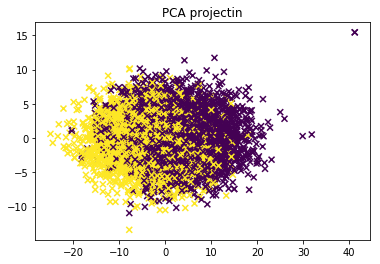

In [93]:
projection = PCA(n_components = 2)
X_train_projected = projection.fit_transform(X_train_m_subf)
print('Proportion of variance explained: {}'.format(projection.explained_variance_ratio_))

plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], c = Y_train, marker = 'x')
plt.title('PCA projectin')
plt.show()

In [37]:
model = XGBClassifier(n_estimators = 1000, max_depth = 2)
model.fit(X_train_m_subf, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_m_subf, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_m_subf, Y_val)))

Train Accuracy: 0.7323061630218688
Validation Accuracy: 0.6935612082670907


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
rdmforest = RandomForestClassifier(n_estimators = 1000, max_depth = 2)
rdmforest.fit(X_train_m_subf, Y_train)

print('Train Accuracy: {}'.format(rdmforest.score(X_train_m_subf, Y_train)))
print('Validation Accuracy: {}'.format(rdmforest.score(X_val_m_subf, Y_val)))

Train Accuracy: 0.6940357852882704
Validation Accuracy: 0.6919713831478538


# Compute more descriptive statistics than average

In [63]:
def descrp_stats(array, axis):
    array_mean = array.mean(axis = axis)
    array_max = array.max(axis = axis)
    array_min = array.min(axis = axis)
    array_std = array.std(axis = axis)
    
    return np.hstack([array_mean, array_max, array_min, array_std])

In [45]:
X_train_m_subf_descrp = descrp_stats(X_train_l_subf, 2)
X_val_m_subf_descrp = descrp_stats(X_val_l_subf, 2)

Proportion of variance explained: [0.6369084  0.12562454]


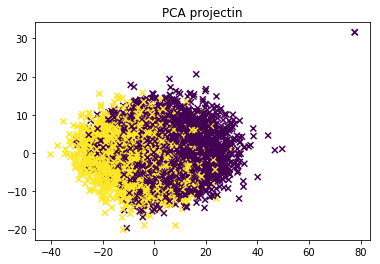

In [90]:
projection = PCA(n_components = 2)
X_train_projected = projection.fit_transform(X_train_m_subf_descrp)
print('Proportion of variance explained: {}'.format(projection.explained_variance_ratio_))

plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], c = Y_train, marker = 'x')
plt.title('PCA projectin')
plt.show()

In [46]:
model = XGBClassifier(n_estimators = 1000, max_depth = 2)
model.fit(X_train_m_subf_descrp, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_m_subf_descrp, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_m_subf_descrp, Y_val)))

Train Accuracy: 0.763817097415507
Validation Accuracy: 0.6963434022257552


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
rdmforest = RandomForestClassifier(n_estimators = 1000, max_depth = 2)
rdmforest.fit(X_train_m_subf_descrp, Y_train)

print('Train Accuracy: {}'.format(rdmforest.score(X_train_m_subf_descrp, Y_train)))
print('Validation Accuracy: {}'.format(rdmforest.score(X_val_m_subf_descrp, Y_val)))

Train Accuracy: 0.6997017892644135
Validation Accuracy: 0.6927662957074722


# Subselect by sequences

In [84]:
X_train_seq = X_train_l_cf.reshape((nb_games_train, 11, 10, -1), order = 'F')
X_train_seq = X_train_seq.mean(axis = 2)
X_train_seq = X_train_seq.reshape((nb_games_train, 11*144), order = 'F')

X_val_seq = X_val_l_cf.reshape((nb_games_val, 11, 10, -1), order = 'F')
X_val_seq = X_val_seq.mean(axis = 2)
X_val_seq = X_val_seq.reshape((nb_games_val, 11*144), order = 'F')

Proportion of variance explained: [0.4960416  0.12774946]


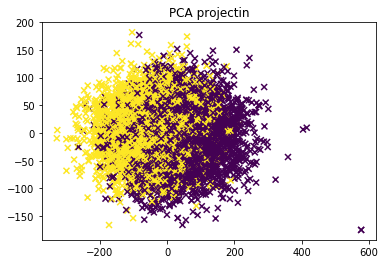

In [89]:
projection = PCA(n_components = 2)
X_train_projected = projection.fit_transform(X_train_seq)
print('Proportion of variance explained: {}'.format(projection.explained_variance_ratio_))

plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], c = Y_train, marker = 'x')
plt.title('PCA projectin')
plt.show()

In [85]:
model = XGBClassifier(n_estimators = 1000, max_depth = 2)
model.fit(X_train_seq, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_seq, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_seq, Y_val)))

Train Accuracy: 0.8425447316103379
Validation Accuracy: 0.7186009538950715


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [86]:
rdmforest = RandomForestClassifier(n_estimators = 1000, max_depth = 2)
rdmforest.fit(X_train_seq, Y_train)

print('Train Accuracy: {}'.format(rdmforest.score(X_train_seq, Y_train)))
print('Validation Accuracy: {}'.format(rdmforest.score(X_val_seq, Y_val)))

Train Accuracy: 0.7201789264413518
Validation Accuracy: 0.715818759936407


In [87]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_seq, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_seq, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_seq, Y_val)))

Train Accuracy: 0.7849900596421471
Validation Accuracy: 0.6951510333863276


In [109]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (20,20,20), 
                     alpha = 5)
model.fit(X_train_seq, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_seq, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_seq, Y_val)))

Train Accuracy: 0.7305168986083499
Validation Accuracy: 0.7237678855325914


# Longer subsequence

In [118]:
X_train_seq_longer = X_train_l_cf.reshape((nb_games_train, 11, 15, -1), order = 'F')
X_train_seq_longer = X_train_seq_longer.mean(axis = 2)
X_train_seq_longer = X_train_seq_longer.reshape((nb_games_train, 11*96), order = 'F')

X_val_seq_longer = X_val_l_cf.reshape((nb_games_val, 11, 15, -1), order = 'F')
X_val_seq_longer = X_val_seq_longer.mean(axis = 2)
X_val_seq_longer = X_val_seq_longer.reshape((nb_games_val, 11*96), order = 'F')

Proportion of variance explained: [0.49681277 0.127948  ]


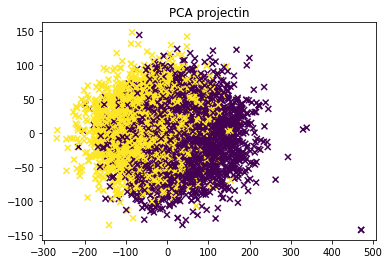

In [119]:
projection = PCA(n_components = 2)
X_train_projected = projection.fit_transform(X_train_seq_longer)
print('Proportion of variance explained: {}'.format(projection.explained_variance_ratio_))

plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], c = Y_train, marker = 'x')
plt.title('PCA projectin')
plt.show()

In [139]:
model = XGBClassifier(n_estimators = 1000, max_depth = 2)
model.fit(X_train_seq_longer, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_seq_longer, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_seq_longer, Y_val)))

Train Accuracy: 0.8447316103379722
Validation Accuracy: 0.7166136724960255


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [140]:
rdmforest = RandomForestClassifier(n_estimators = 1000, max_depth = 2)
rdmforest.fit(X_train_seq_longer, Y_train)

print('Train Accuracy: {}'.format(rdmforest.score(X_train_seq_longer, Y_train)))
print('Validation Accuracy: {}'.format(rdmforest.score(X_val_seq_longer, Y_val)))

Train Accuracy: 0.7193836978131213
Validation Accuracy: 0.7126391096979332


In [141]:
model = LogisticRegression()
model.fit(X_train_seq_longer, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_seq_longer, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_seq_longer, Y_val)))

Train Accuracy: 0.76441351888668
Validation Accuracy: 0.699523052464229


In [137]:
model = MLPClassifier(hidden_layer_sizes = (50,20), 
                     alpha = 10)
model.fit(X_train_seq_longer, Y_train)

print('Train Accuracy: {}'.format(model.score(X_train_seq_longer, Y_train)))
print('Validation Accuracy: {}'.format(model.score(X_val_seq_longer, Y_val)))

Train Accuracy: 0.7208747514910536
Validation Accuracy: 0.7182034976152624
